<a href="https://colab.research.google.com/github/ceydanurilhan/TensorFlow-Examples/blob/master/outfitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras


In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['Tshirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

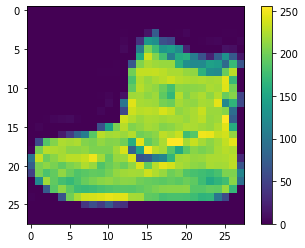

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

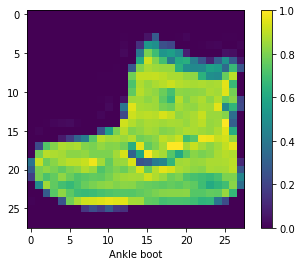

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[train_labels[0]])
plt.show()

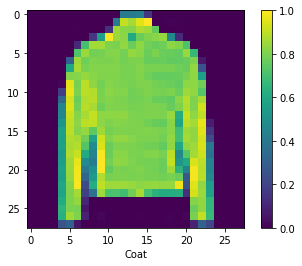

In [0]:
plt.figure()
plt.imshow(train_images[889])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[train_labels[889]])
plt.show()

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
              )

In [0]:
model.fit(train_images , train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4963 - accuracy: 0.8278
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3715 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3315 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3089 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2934 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2785 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2657 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2563 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2474 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [0]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [0]:
predictions[0]

array([2.4994345e-06, 1.6891009e-07, 5.9216925e-09, 5.3373079e-09,
       1.9056612e-06, 1.7791890e-02, 5.7652769e-06, 5.0218191e-02,
       1.8304233e-07, 9.3197930e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

In [0]:
predictions[5]

array([3.6449767e-06, 9.9999607e-01, 1.1097468e-07, 1.0600812e-08,
       7.1523651e-08, 2.0624497e-18, 5.8198584e-08, 2.2193978e-18,
       2.3006692e-12, 1.0656961e-13], dtype=float32)

In [0]:
np.argmax(predictions[5])

1

In [0]:
test_labels[5]

1

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

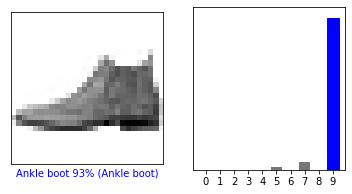

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

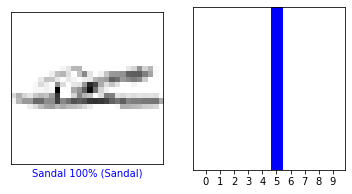

In [0]:
i = 1568
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

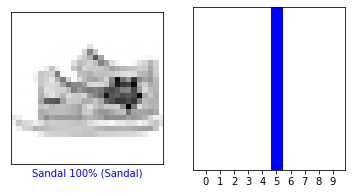

In [0]:
i = 9999
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

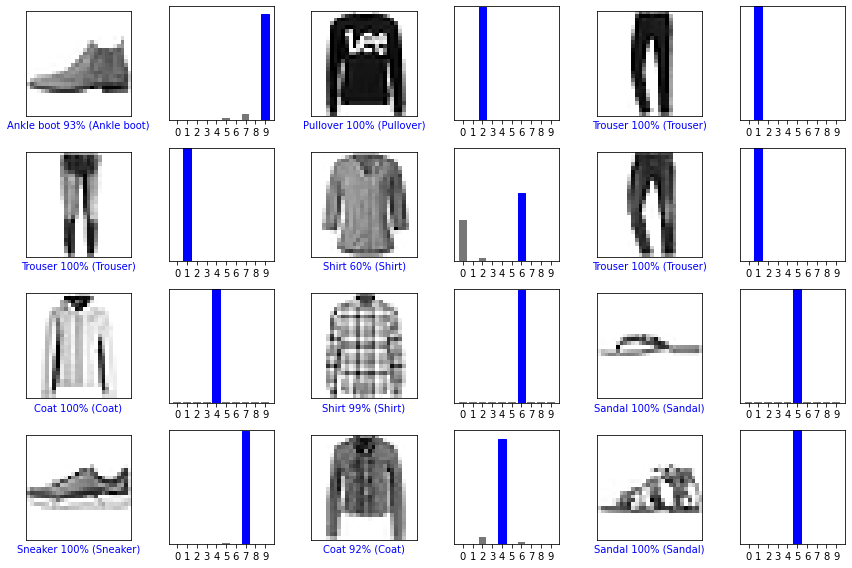

In [0]:
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()